### Let's get the tools, the data, do some cleaning and visualization

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(rc={'figure.figsize':(12.,6.)})
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# we get the tool to make a visualization with sweetviz
import sweetviz as sv

In [3]:
#get the data in to data frame without header
df = pd.read_csv('regression_data.csv', header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [5]:
#rename the headers
df = df.rename(columns={0: "id", 1: "date", 2: "bedrooms", 3: "bathrooms",
                       4: "sqft_living", 5: "sqft_lot", 6: "floors", 7: "waterfront",
                       8: "view", 9: "condition", 10: "grade", 11: "sqft_above",
                       12: "sqft_basement", 13: "yr_built", 14: "yr_renovated", 15: "zipcode",
                       16: "lat", 17: "long", 18: "sqft_living15", 19: "sqft_lot15",
                       20:"price"})

In [6]:
#check for duplicated data
df[df.duplicated()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [7]:
df.duplicated().sum()

0

In [8]:
#use sweetviz to get a first idea of the data
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
#look for types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
# lets drop id and date ?

df1 = df.drop(['id', 'date'], axis = 1, inplace = False)

In [12]:
df1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [13]:
#lets see the global visualization of this data
from pandas.plotting import scatter_matrix 

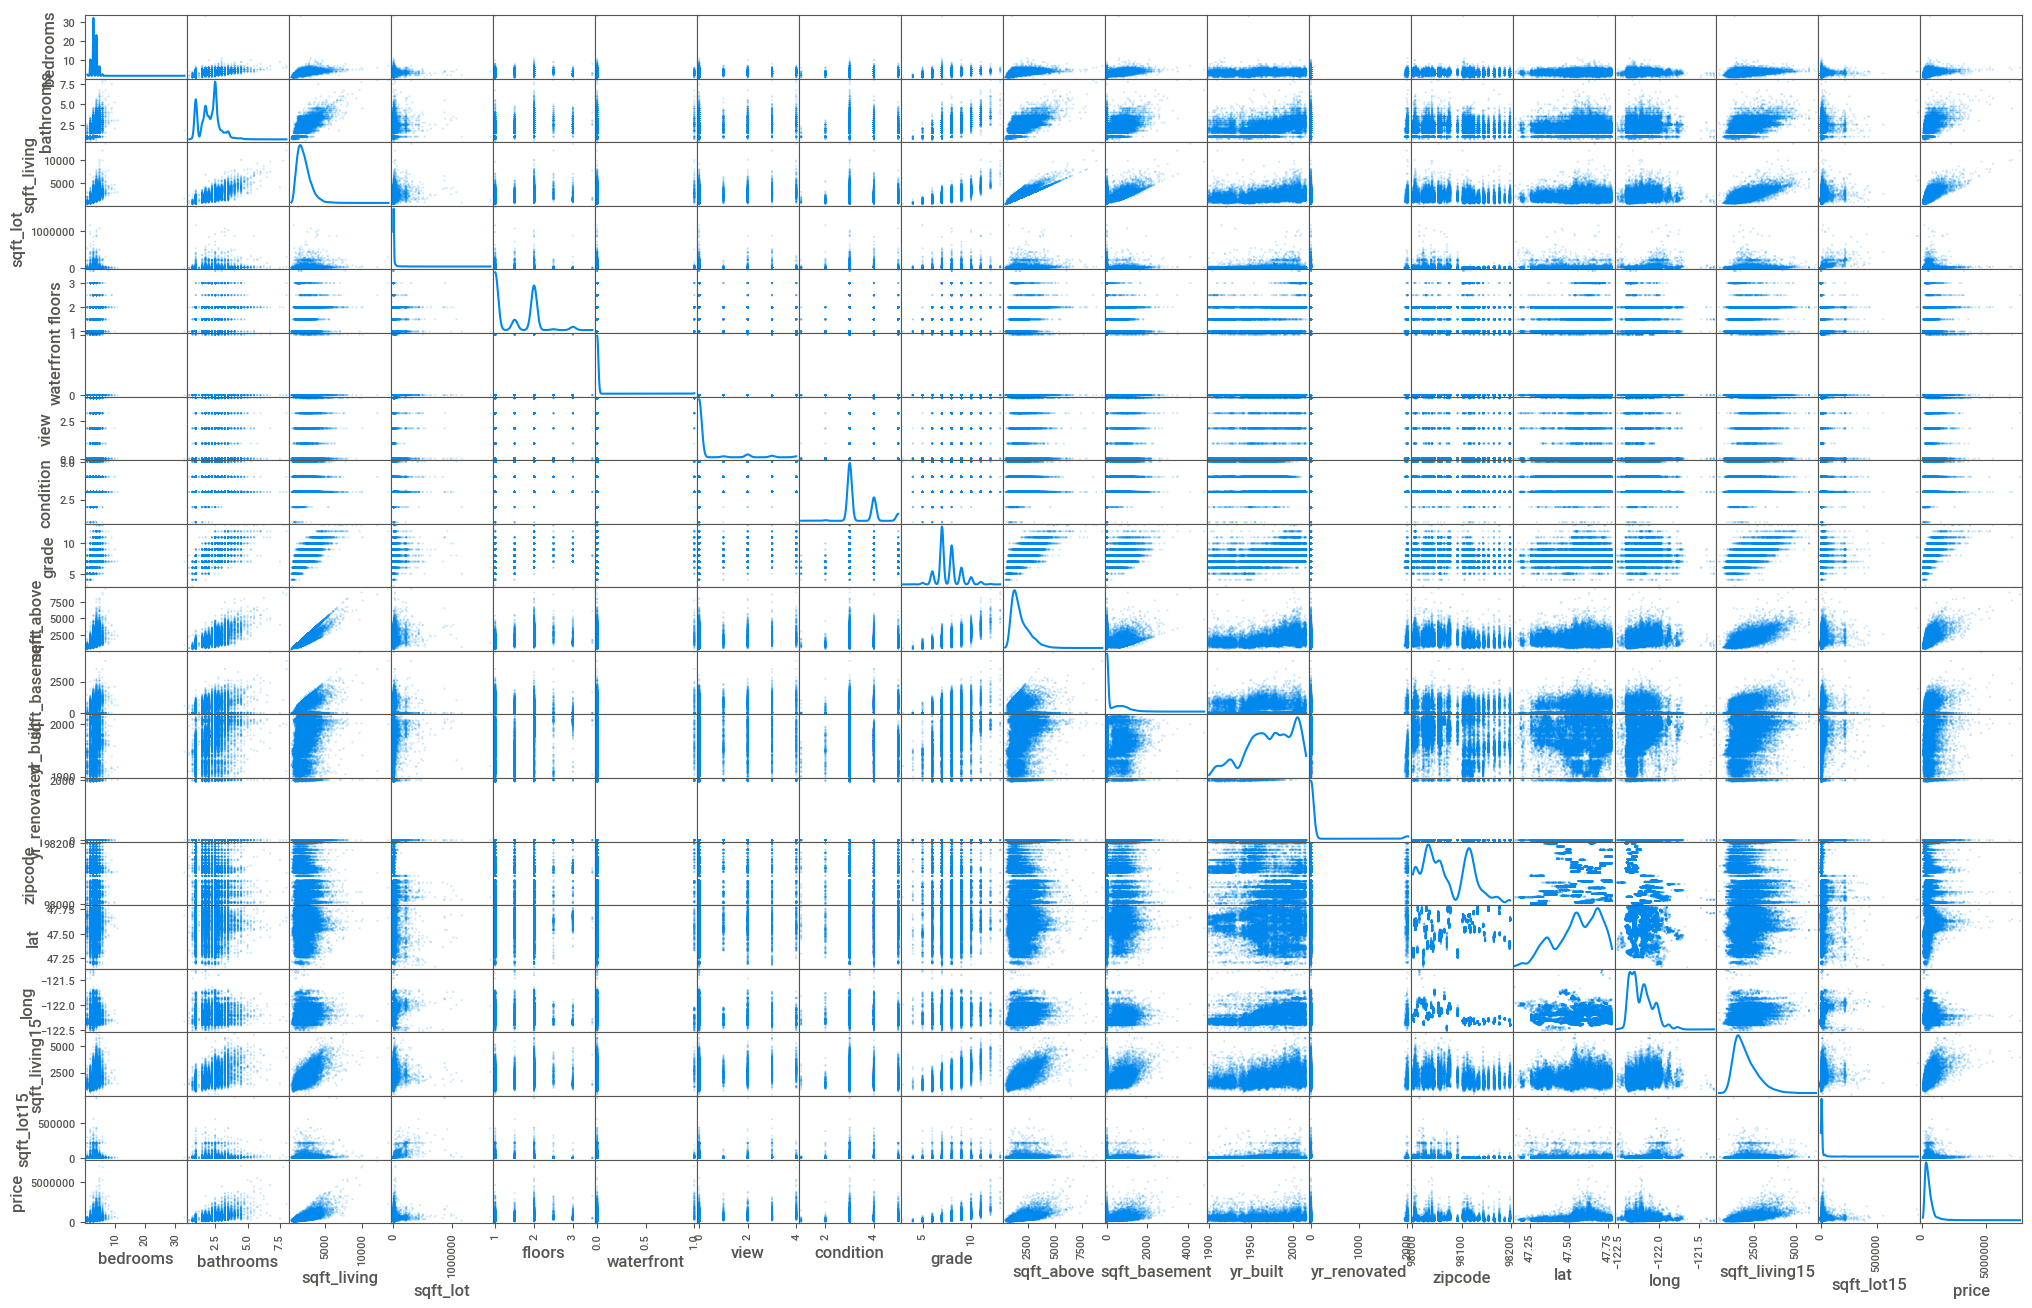

In [14]:
# lets do a scatter matrix 
scatter_matrix(df1,alpha=0.2, figsize=(25,16),diagonal='kde');

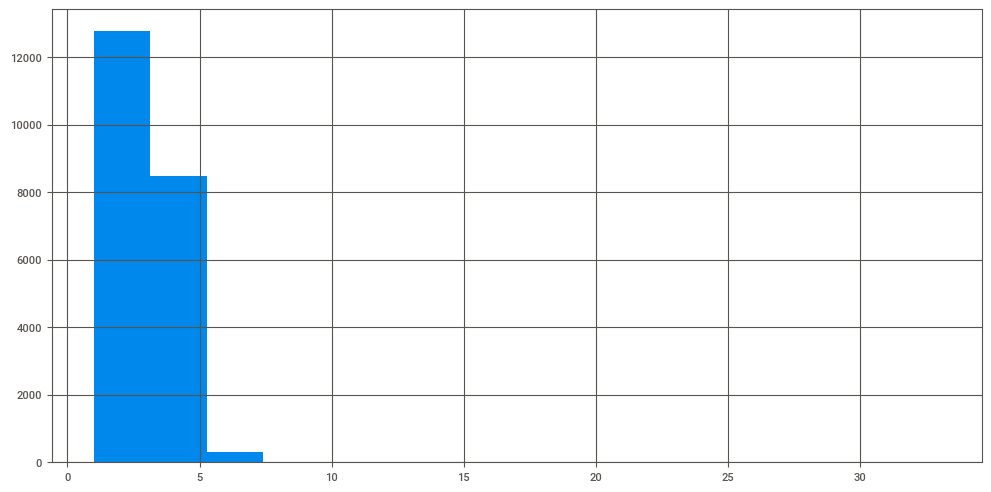

In [15]:
#looking at outliers and droping them
#from the sweetbiz and tableau we know we have an outlier on bedrooms
df1['bedrooms'].hist(bins=15);

In [16]:
df1[df1['bedrooms']>9]

#there might be a little trend here on how the ratio bedrooms/bathrooms shows the kind of building
#and how this afects the price

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8748,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,520000
13301,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1150000
15147,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000
15856,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000
19239,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000


<AxesSubplot:>

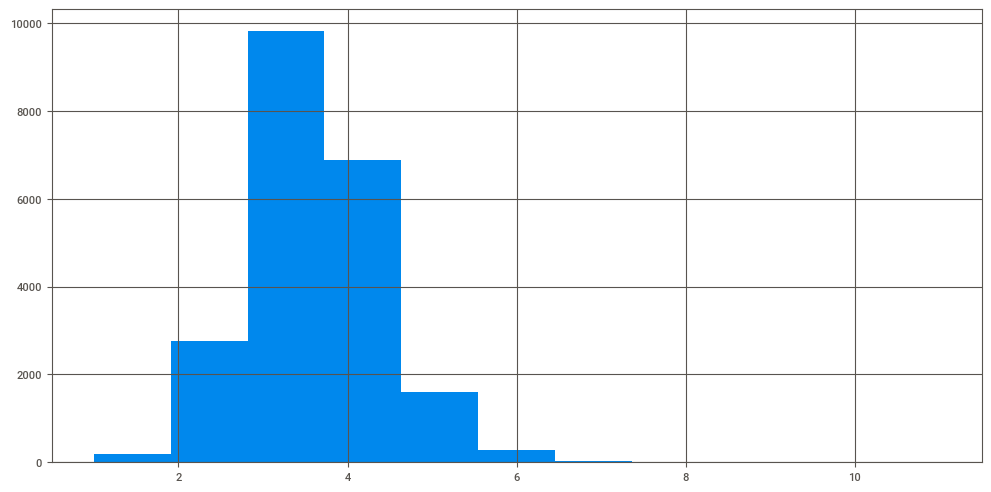

In [17]:
df1[df1['bedrooms']<12]['bedrooms'].hist(bins=11)

In [18]:
#we drop the values with +12 bedrooms
df1 = df1[df1['bedrooms']<12]
df1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [19]:
#first correlation matrix heatmap but its not showing all the information that we want
#sns.heatmap(df1.corr());

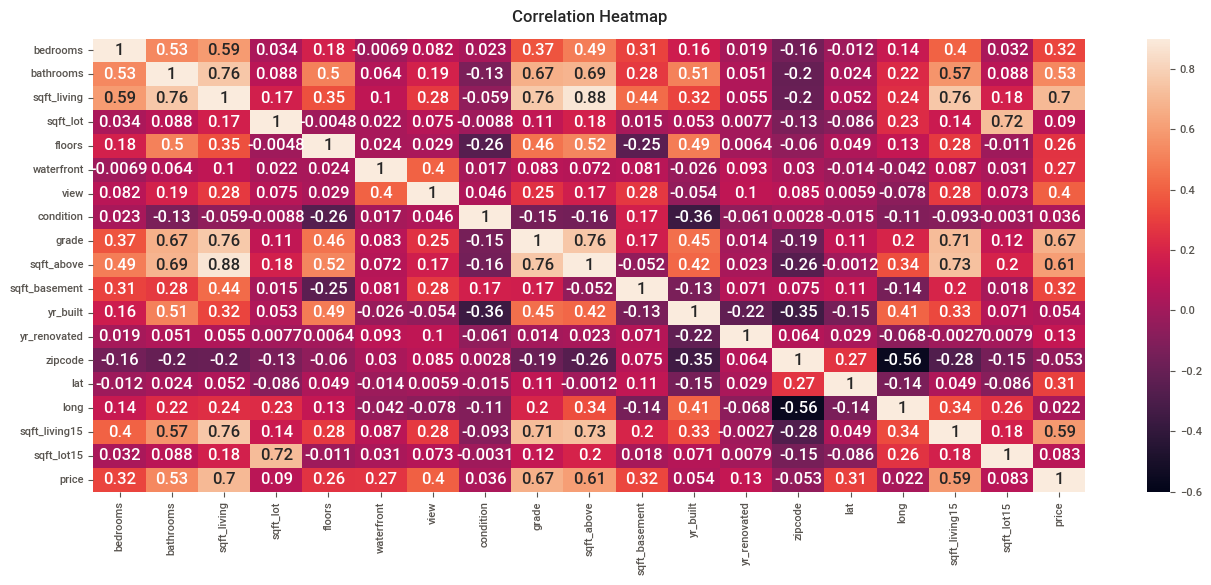

In [20]:
#now we shouw everything on the corr matrix heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-0.6, vmax=0.9, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

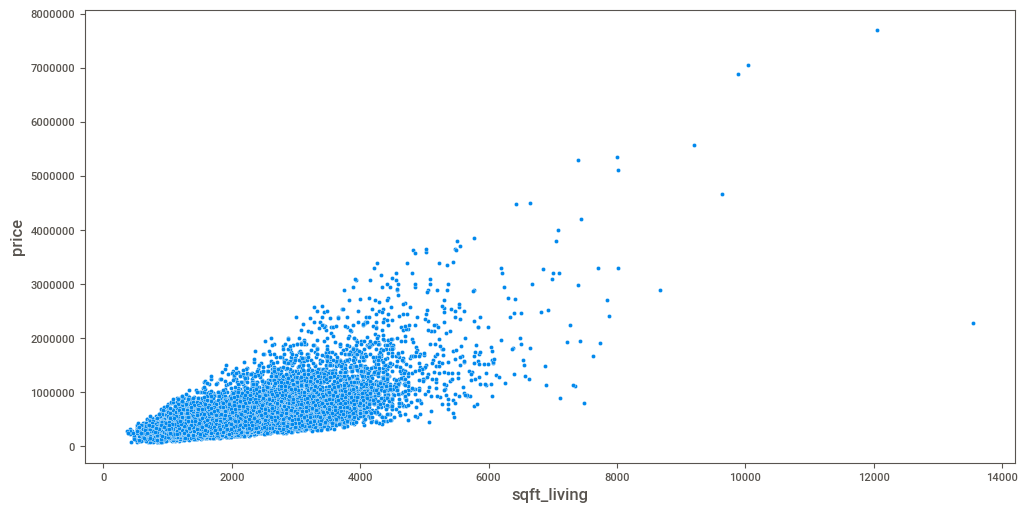

In [21]:
# we can see some negative correlations and some positive (that might show multicollinearity)
#but im gona plot some of the price correlations

#lets scatterplot  sqft_living v price
sns.scatterplot(data=df1, x="sqft_living", y="price");


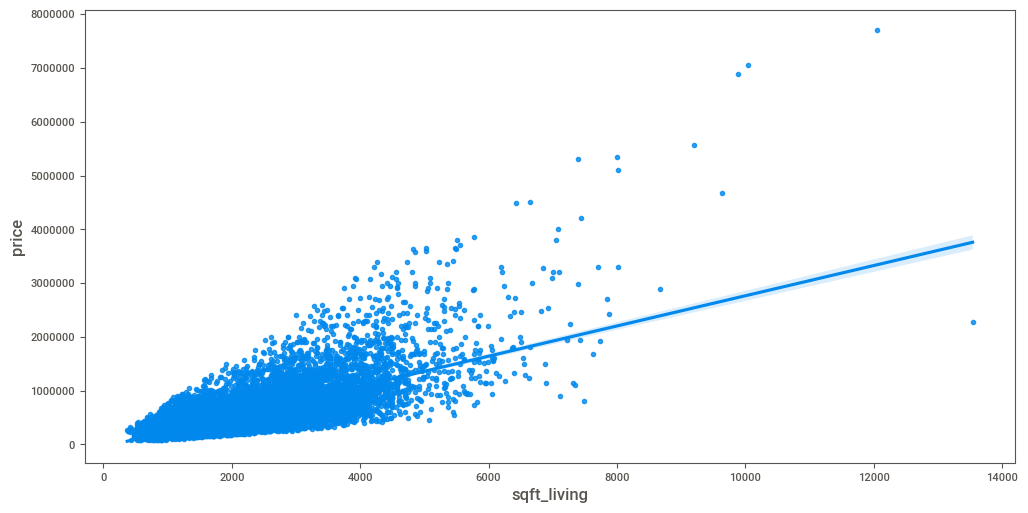

In [22]:
#lets show the reg line
sns.regplot(x="sqft_living", y="price", data=df1);

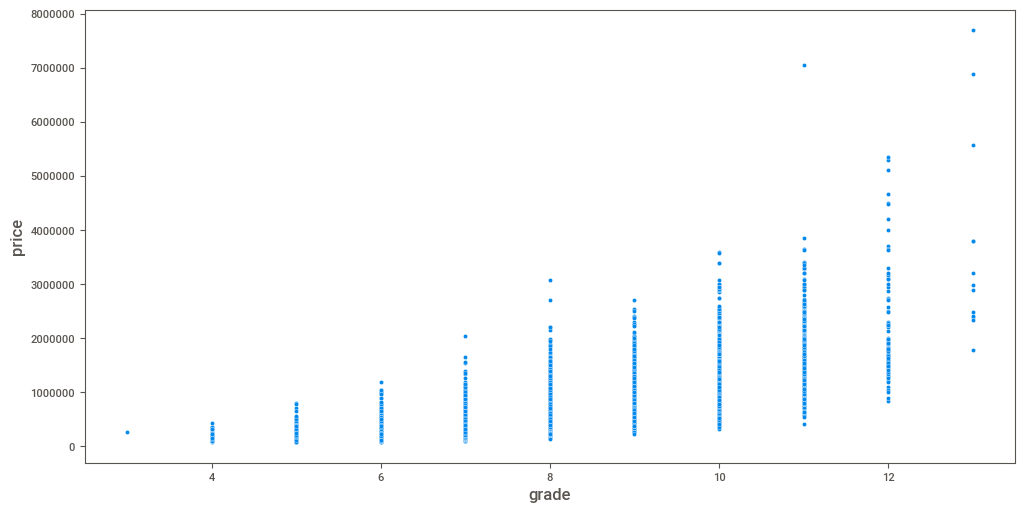

In [23]:
#lets scatterplot  grade price
sns.scatterplot(data=df1, x="grade", y="price");

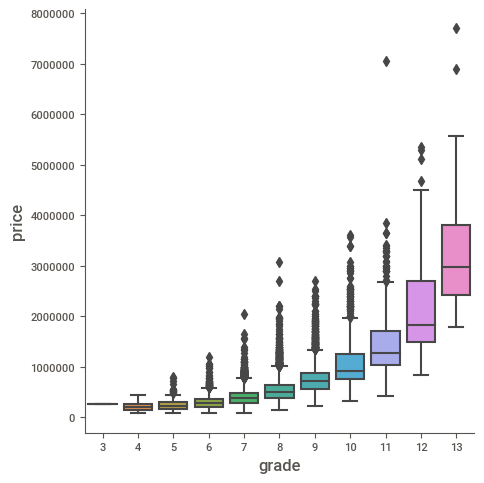

In [24]:
#lets see boxplot
sns.catplot(x='grade', y="price", kind='box',data=df1);

<AxesSubplot:xlabel='grade', ylabel='price'>

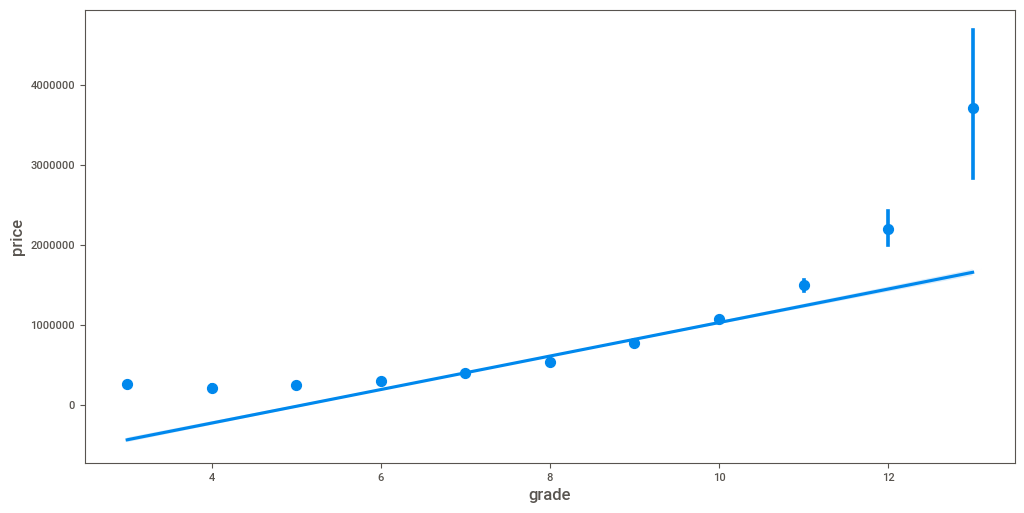

In [25]:
# the reg line relative to the mean
sns.regplot(x="grade", y="price", data=df1, x_estimator=np.mean)

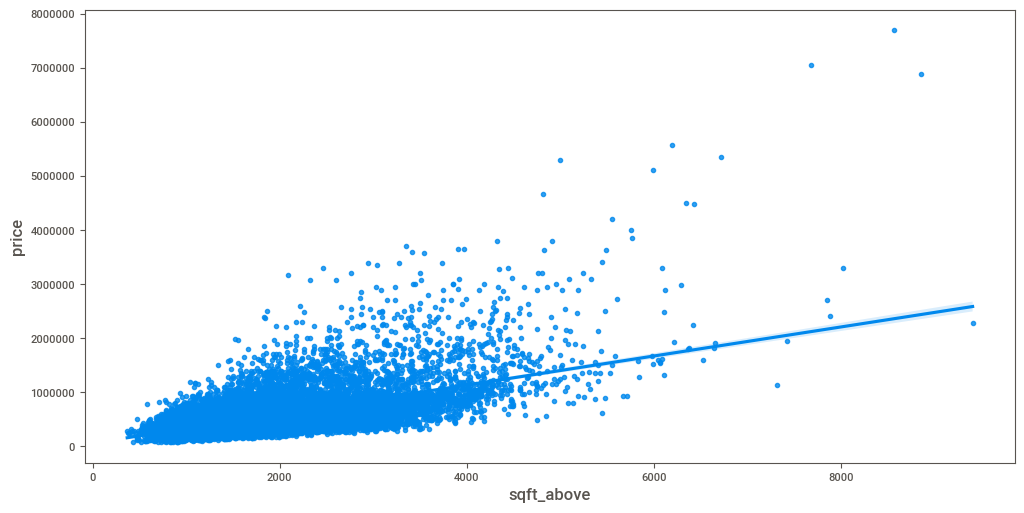

In [26]:
#lets scatterplot  sqft above price
sns.regplot(data=df1, x="sqft_above", y="price");

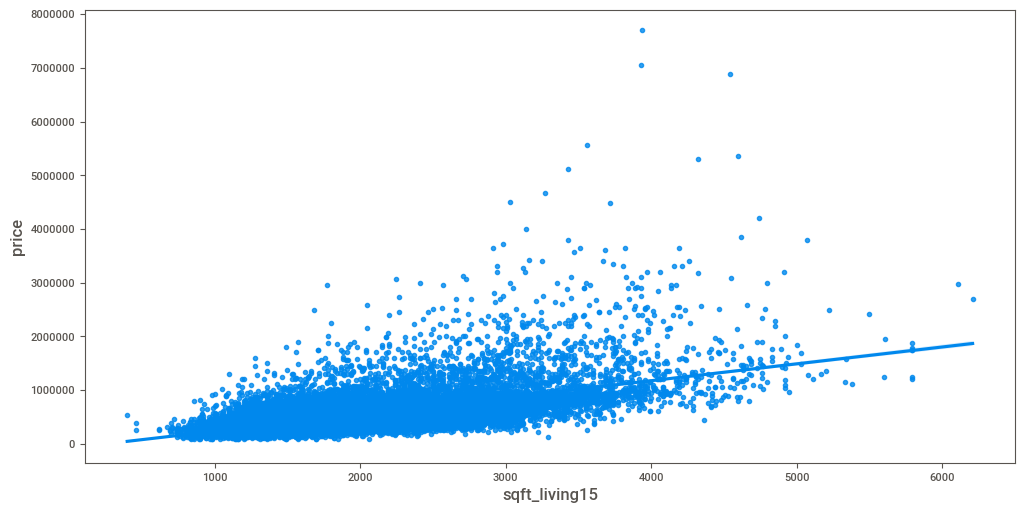

In [27]:
#scatter and reg line of sqft living in 2015 vs price
sns.regplot(x="sqft_living15", y="price", data=df1);

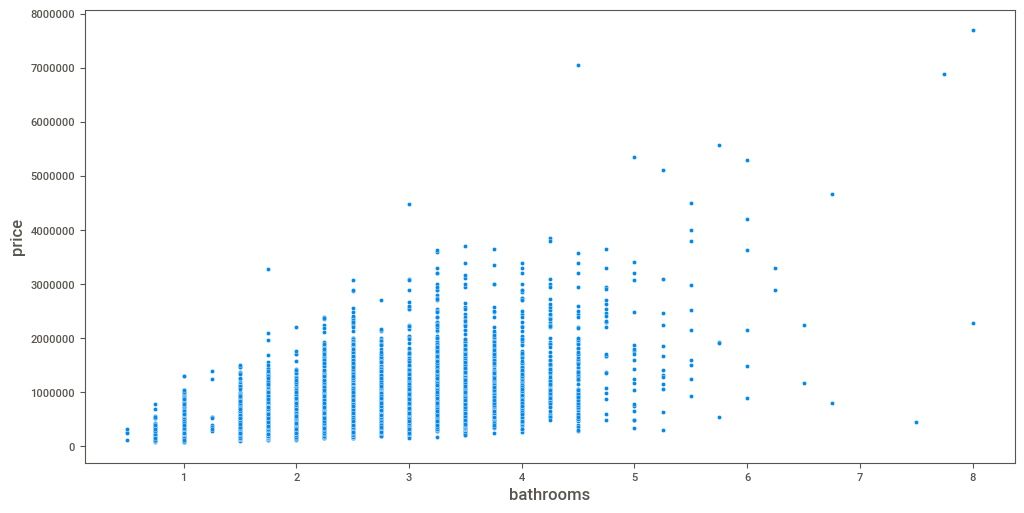

In [28]:
#lets scatterplot  bathrooms price
sns.scatterplot(data=df1, x="bathrooms", y="price");

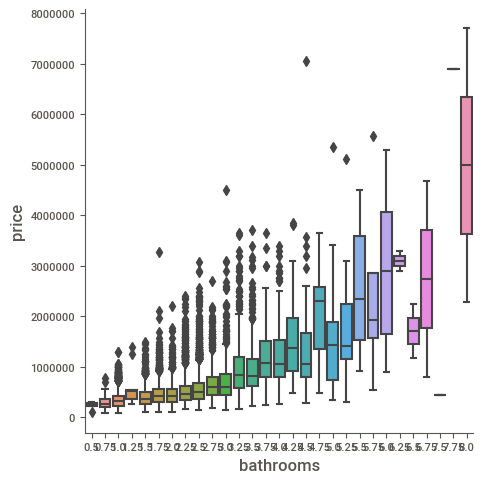

In [29]:
#the boxplot cat of bathrooms
sns.catplot(x='bathrooms', y="price", kind='box',data=df1);

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

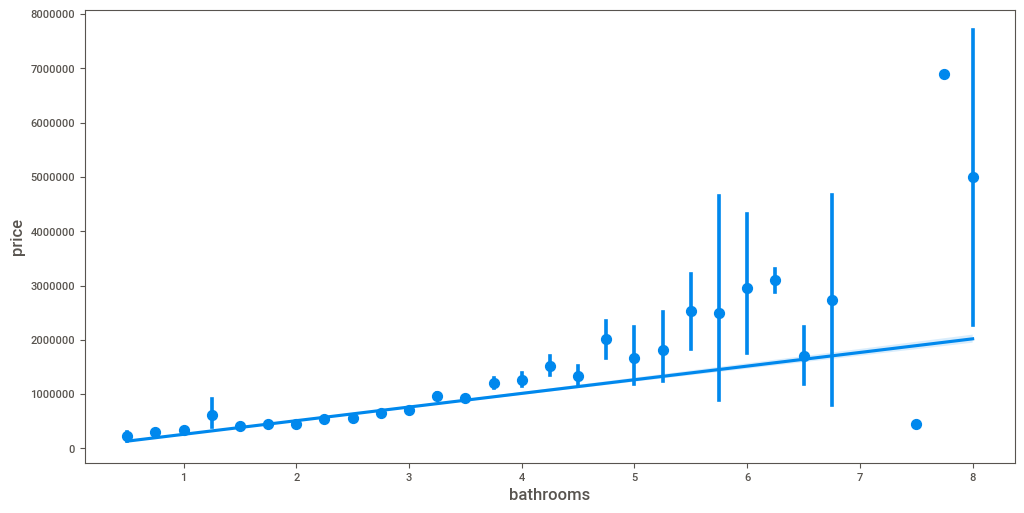

In [30]:
# the reg line relative to the mean
sns.regplot(x="bathrooms", y="price", data=df1, x_estimator=np.mean)

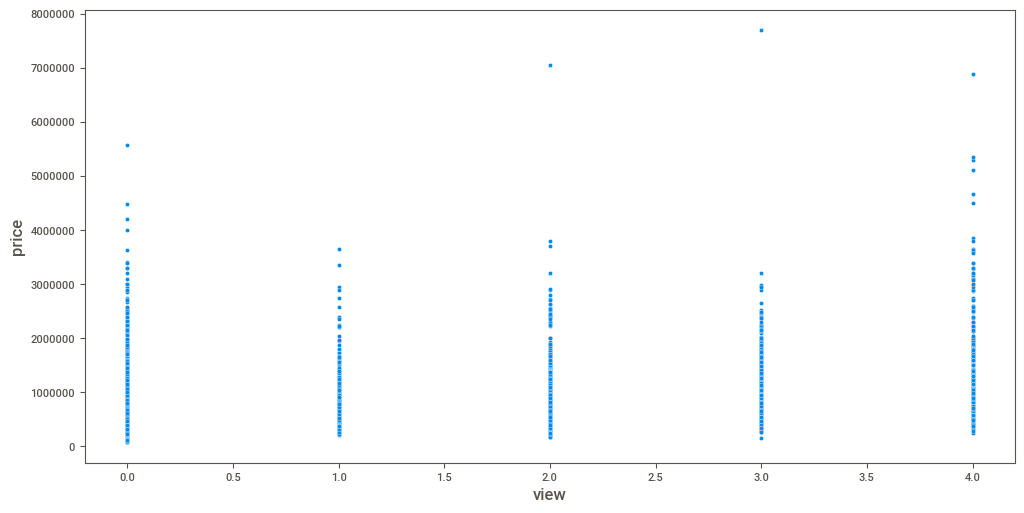

In [31]:
#lets scatterplot  view price
sns.scatterplot(data=df1, x="view", y="price");

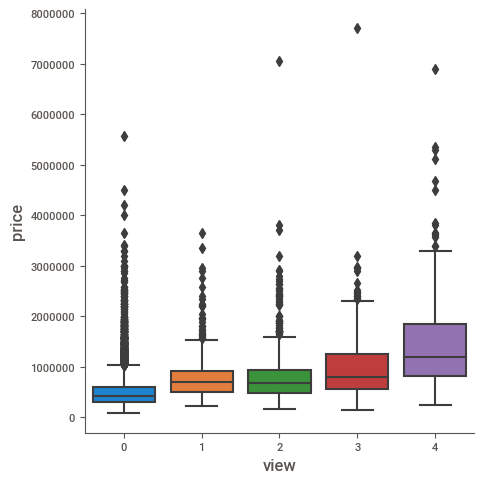

In [32]:
#the boxplot cat of view
sns.catplot(x='view', y="price", kind='box',data=df1);

<AxesSubplot:xlabel='view', ylabel='price'>

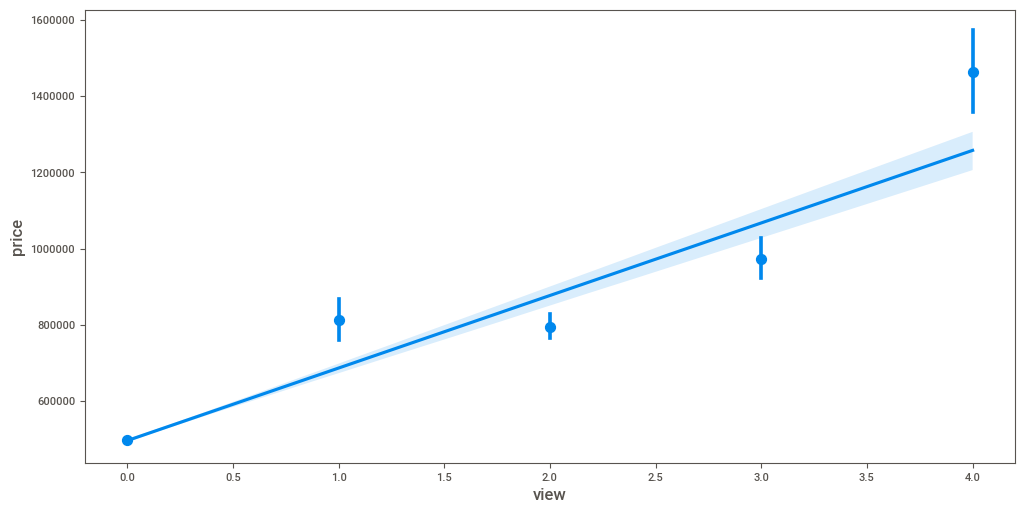

In [33]:
# the reg line relative to the mean
sns.regplot(x="view", y="price", data=df1, x_estimator=np.mean)

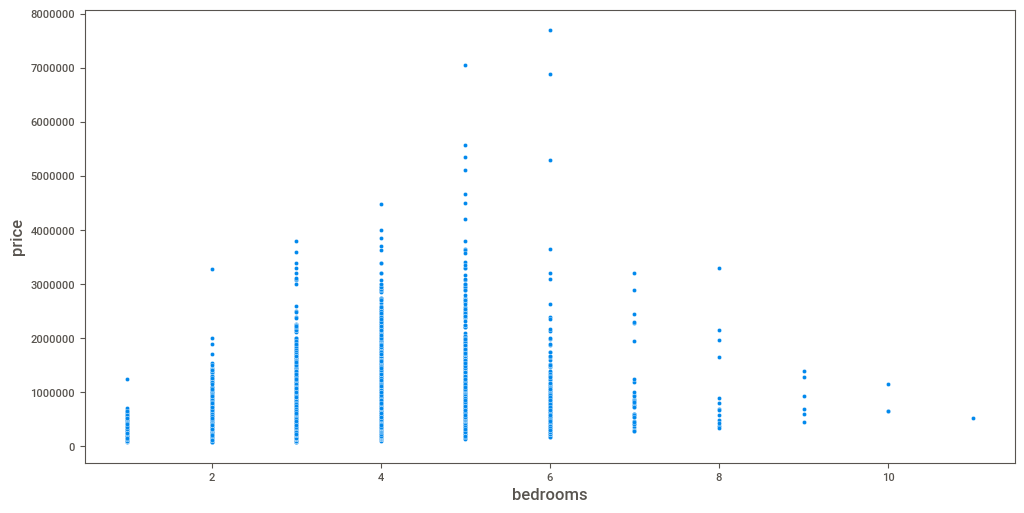

In [34]:
#lets scatterplot  bedrooms price
sns.scatterplot(data=df1, x="bedrooms", y="price");

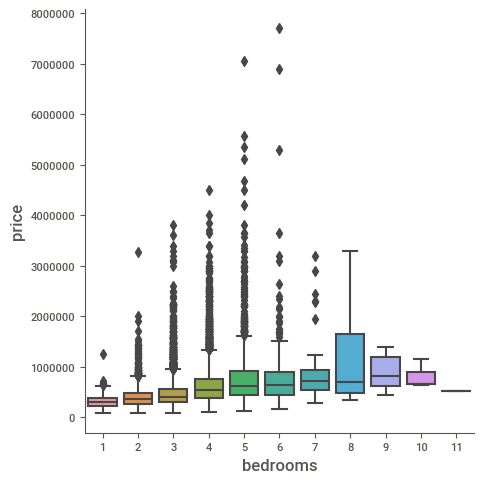

In [35]:
#the boxplot cat of bedrooms
sns.catplot(x='bedrooms', y="price", kind='box',data=df1);

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

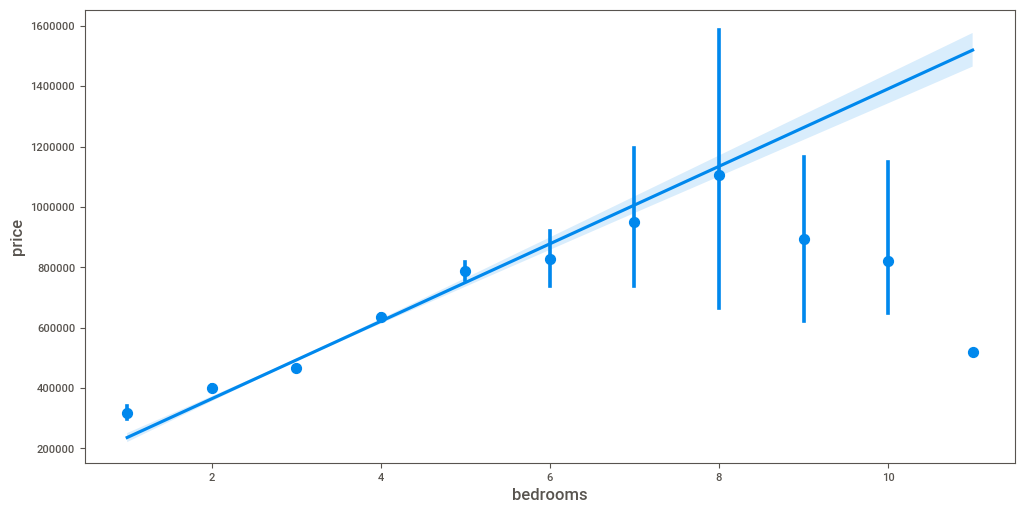

In [36]:
#linear reg over the mean of bedrooms
sns.regplot(x="bedrooms", y="price", data=df1, x_estimator=np.mean)

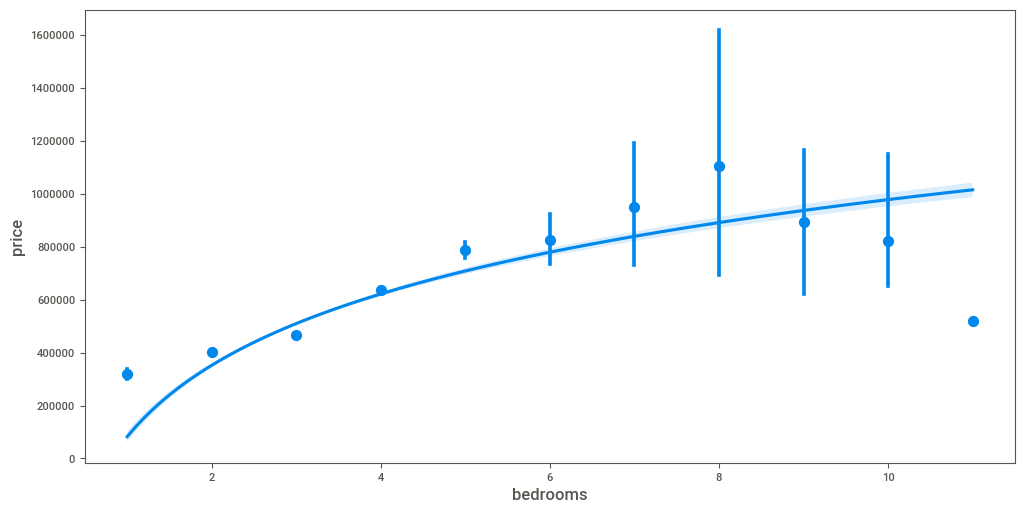

In [37]:
#if we dont use a linear reg but a log maybe we would have better results? 
sns.regplot(x="bedrooms", y="price", data=df1,  x_estimator=np.mean, logx=True);

In [38]:
df1.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,2.159600e+04
mean,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.007548,0.234303,3.409752,7.657946,1788.631506,291.711660,1971.000787,84.468698,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,5.402920e+05
std,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.086551,0.766406,0.650471,1.173218,827.763251,442.673703,29.375460,401.830330,53.514040,0.138552,0.140725,685.231768,27275.018316,3.673760e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


### Now lets build our first model

In [39]:
df1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [40]:
#just to be careful we will work with a new df named after df basic model
dfb = df1.copy(deep = True)

In [41]:
#now we could do the rescaling
# alredy imported as from sklearn.preprocessing import MinMaxScaler

for c in dfb.columns[:-1]:
    dfb[c]=MinMaxScaler().fit_transform(dfb[c].values.reshape(-1,1))

In [42]:
#lets look how did it work the rescaling
dfb

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,221900
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,538000
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,180000
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,604000
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,360000
21593,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,400000
21594,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,402101
21595,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,400000


In [43]:
# now we can split the data etc and train our first model

X = dfb.drop(columns=['price'])
y = dfb['price']

In [44]:
# lets do the train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [45]:
#import the linear reg
from sklearn.linear_model import LinearRegression as Lin

In [46]:
#train the model
linreg = Lin()
linreg.fit(X_train,y_train)

LinearRegression()

In [47]:
#make some predictions on test 
y_pred=linreg.predict(X_test)

### And evaluate

In [48]:
#now we import the tools to evaluate the model
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae 


In [49]:
# r squared
r2(y_test,y_pred)

0.7033989146293402

In [50]:
#mean squared error
mse(y_test,y_pred)

38727096279.78106

In [51]:
#mean absolute error
mae(y_test,y_pred)

125855.66884705385

In [52]:
#root mean squared error

np.sqrt(mse(y_test, y_pred))

196792.01274386383

### Now let's perfectionate our model

In [53]:
#get the original data again
dfi1 = df1.copy(deep = True)

In [54]:
dfi1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [55]:
# column candidates to apply box-cox transformation
# box-cox transformation:, , sqft_living sqft_lot, floors, view, condition, sqft_above, sqft_living15, sqft_lot15
#also sqft_lot15 maybe we should do some powertransf log or something???
#quantile transf? sqft_basement

#things to change age, zipcode, yr_renovation

#lets get the tools

from sklearn import preprocessing
from scipy import stats

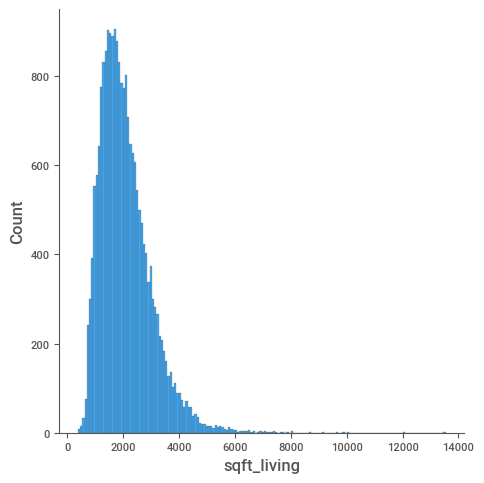

In [56]:
#plot of the distr 
sns.displot(dfi1['sqft_living']);

In [57]:

#we apply box-cox transformation
sqft_living_new, sqft_living_lambda = stats.boxcox(dfi1['sqft_living'])


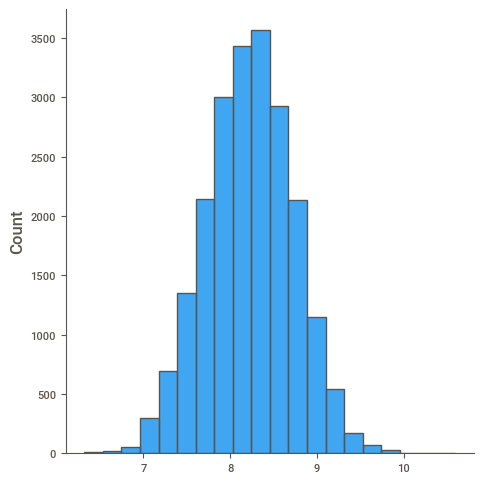

In [58]:
#how did it change the distribution
sns.displot(sqft_living_new,bins=20);

In [59]:
#replace the column sqft_living
dfi1['sqft_living'] = sqft_living_new

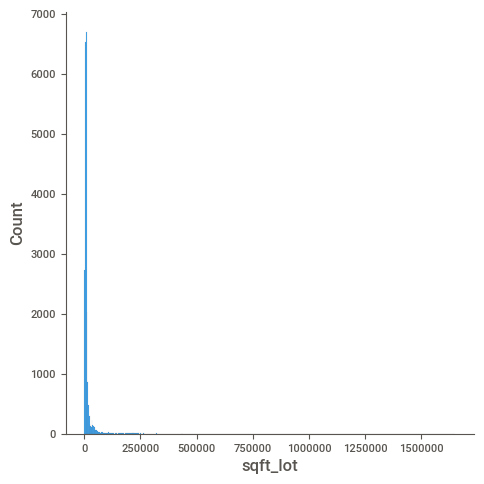

In [60]:
#plot the distr
sns.displot(dfi1['sqft_lot'], bins=500)

In [61]:
#for sqft_lot we can use log transformation

sqft_lot_new= np.log(df['sqft_lot']) 

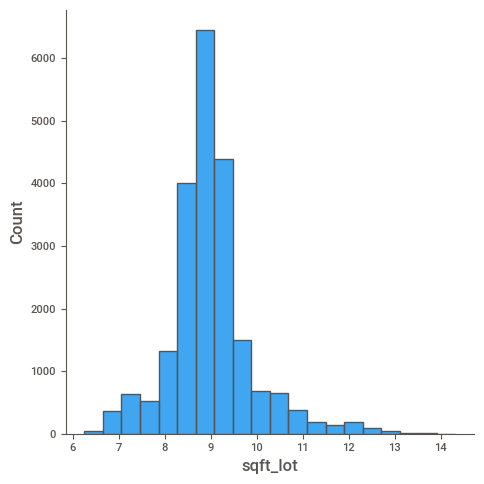

In [62]:
#new distr with log transformation
sns.displot(sqft_lot_new, bins=20)

In [63]:
#apply boxcox transformation
sqft_lot_new2, sqft_lot_lambda = stats.boxcox(dfi1['sqft_lot'])

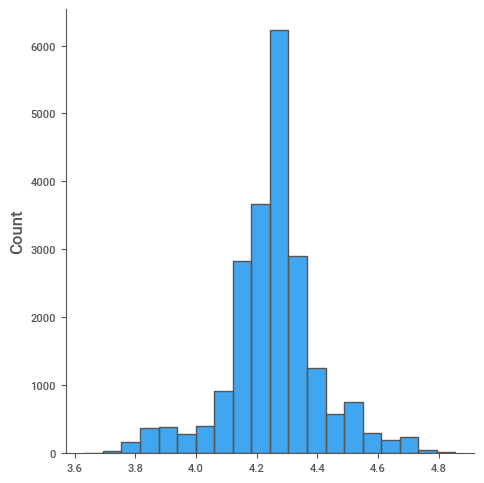

In [64]:
#plot new distr with boxcox
sns.displot(sqft_lot_new2, bins=20)

In [65]:
#replace the column sqft_lot
dfi1['sqft_lot'] = sqft_lot_new2

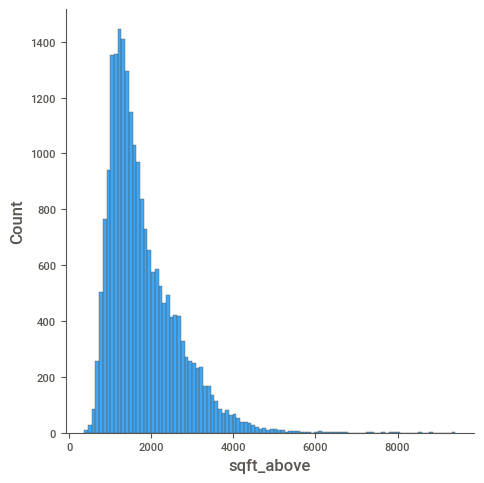

In [66]:
#plot the distr of the above
sns.displot(dfi1['sqft_above'], bins=100)

In [67]:

#we apply box-cox transformation
sqft_above_new, sqft_above_lambda = stats.boxcox(dfi1['sqft_above'])


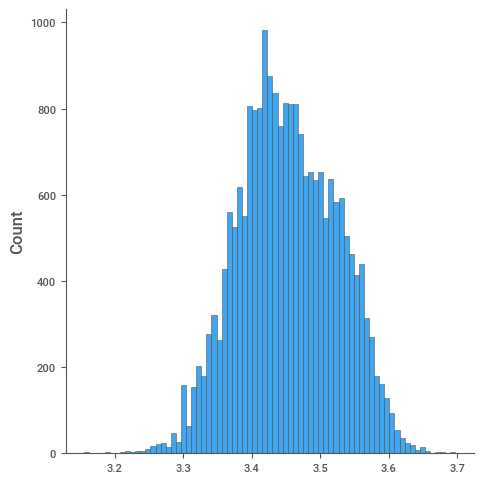

In [68]:
#plot the distr
sns.displot(sqft_above_new)

In [69]:
#replace the column sqft_above
dfi1['sqft_above'] = sqft_above_new

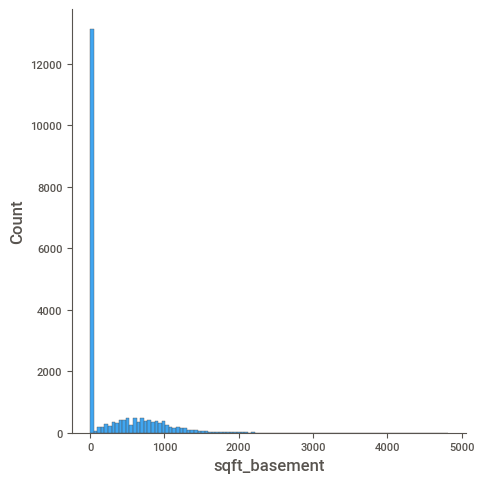

In [70]:
#plot the distr of the basement
sns.displot(dfi1['sqft_basement'], bins=100)

In [71]:
# apply yeojohnson

sqft_basement_new, sqft_basement_lambda = stats.yeojohnson(dfi1['sqft_basement'], lmbda=None)

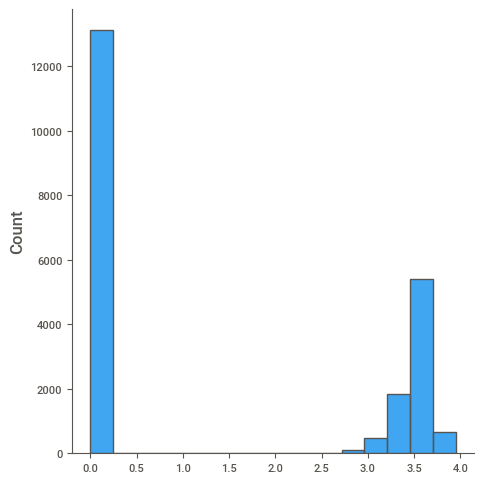

In [72]:
#plot the new dstr of basement
sns.displot(sqft_basement_new)

In [73]:
#replace basement
dfi1['sqft_basement'] = sqft_basement_new

In [74]:
#lets take a look at yr_renavated
dfi1['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21596, dtype: int64

In [75]:
#we make a function to see if there was any renovation
def renove(y_re):
    if y_re == 0:
        return 0
    else:
        return 1

In [76]:
#applt the function on yr_renovated

renovation=list(map(renove, dfi1['yr_renovated']))


In [77]:
#make sure our length is the same as the column
len(renovation)

21596

In [78]:
dfi1['renovated'] = renovation

In [79]:
dfi1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated
0,3,1.00,7.659312,4.203779,1.0,0,0,3,7,3.399396,-0.000000,1955,0,98178,47.5112,-122.257,1340,5650,221900,0
1,3,2.25,8.578077,4.249537,2.0,0,0,3,7,3.502816,3.402792,1951,1991,98125,47.7210,-122.319,1690,7639,538000,1
2,2,1.00,7.162156,4.305832,1.0,0,0,3,6,3.317352,-0.000000,1933,0,98028,47.7379,-122.233,2720,8062,180000,0
3,4,3.00,8.256446,4.180433,1.0,0,0,5,7,3.377792,3.615753,1965,0,98136,47.5208,-122.393,1360,5000,604000,0
4,3,2.00,8.074332,4.269033,1.0,0,0,3,8,3.461207,-0.000000,1987,0,98074,47.6168,-122.045,1800,7503,510000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,7.964144,3.847712,3.0,0,0,3,8,3.445351,-0.000000,2009,0,98103,47.6993,-122.346,1530,1509,360000,0
21593,4,2.50,8.451242,4.209133,2.0,0,0,3,8,3.512598,-0.000000,2014,0,98146,47.5107,-122.362,1830,7200,400000,0
21594,2,0.75,7.489082,3.892518,2.0,0,0,3,7,3.372332,-0.000000,2009,0,98144,47.5944,-122.299,1020,2007,402101,0
21595,3,2.50,8.016821,4.026914,2.0,0,0,3,8,3.452979,-0.000000,2004,0,98027,47.5345,-122.069,1410,1287,400000,0


In [80]:
#we make a mask function
def yr_comb(y_renov, y_built):
    if y_renov == 0:
        return y_built
    else:
        return y_renov
    

In [81]:
#we apply the function to the yr_renovated and yr_built
yr_combined=list(map(yr_comb,dfi1['yr_renovated'],dfi1['yr_built']))

In [82]:
#substitute the column
dfi1['yr_renovated'] = yr_combined

In [83]:
#change the year built by how many years ago it was constructed
dfi1['yr_built'] = dfi1['yr_built'].sub(2015).mul(-1)

In [84]:
#change the year renov by how many years ago it was renovated
dfi1['yr_renovated'] = dfi1['yr_renovated'].sub(2015).mul(-1)

In [85]:
#lets look how did it work the rescaling etc
dfi1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated
0,3,1.00,7.659312,4.203779,1.0,0,0,3,7,3.399396,-0.000000,60,60,98178,47.5112,-122.257,1340,5650,221900,0
1,3,2.25,8.578077,4.249537,2.0,0,0,3,7,3.502816,3.402792,64,24,98125,47.7210,-122.319,1690,7639,538000,1
2,2,1.00,7.162156,4.305832,1.0,0,0,3,6,3.317352,-0.000000,82,82,98028,47.7379,-122.233,2720,8062,180000,0
3,4,3.00,8.256446,4.180433,1.0,0,0,5,7,3.377792,3.615753,50,50,98136,47.5208,-122.393,1360,5000,604000,0
4,3,2.00,8.074332,4.269033,1.0,0,0,3,8,3.461207,-0.000000,28,28,98074,47.6168,-122.045,1800,7503,510000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,7.964144,3.847712,3.0,0,0,3,8,3.445351,-0.000000,6,6,98103,47.6993,-122.346,1530,1509,360000,0
21593,4,2.50,8.451242,4.209133,2.0,0,0,3,8,3.512598,-0.000000,1,1,98146,47.5107,-122.362,1830,7200,400000,0
21594,2,0.75,7.489082,3.892518,2.0,0,0,3,7,3.372332,-0.000000,6,6,98144,47.5944,-122.299,1020,2007,402101,0
21595,3,2.50,8.016821,4.026914,2.0,0,0,3,8,3.452979,-0.000000,11,11,98027,47.5345,-122.069,1410,1287,400000,0


In [86]:
dfi1.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated
count,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000
mean,3.371828,2.115843,8.223352,4.254457,1.494119,0.007548,0.234303,3.409752,7.657946,3.452245,1.379992,43.999213,41.616457,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,5.402920e+05,0.042323
std,0.904114,0.768998,0.501643,0.152804,0.539685,0.086551,0.766406,0.650471,1.173218,0.071667,1.718860,29.375460,28.808776,53.514040,0.138552,0.140725,685.231768,27275.018316,3.673760e+05,0.201329
min,1.000000,0.500000,6.319533,3.631856,1.000000,0.000000,0.000000,1.000000,3.000000,3.155277,-0.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,0.000000
25%,3.000000,1.750000,7.884651,4.181972,1.000000,0.000000,0.000000,3.000000,7.000000,3.400935,-0.000000,18.000000,16.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,0.000000
50%,3.000000,2.250000,8.225874,4.258624,1.500000,0.000000,0.000000,3.000000,7.000000,3.448672,-0.000000,40.000000,38.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,0.000000
75%,4.000000,2.500000,8.568776,4.316972,2.000000,0.000000,0.000000,4.000000,8.000000,3.505689,3.494404,64.000000,61.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,0.000000
max,11.000000,8.000000,10.593474,4.854979,3.500000,1.000000,4.000000,5.000000,13.000000,3.697674,3.949756,115.000000,115.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,1.000000


In [87]:

dfi1.drop(columns=[ 'yr_built', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [88]:
# X and y
X = dfi1.drop(columns=['price'])
y = dfi1['price']

In [89]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [90]:
#train 
linreg = Lin(normalize=True)
linreg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [91]:
# predictions on test 
y_pred=linreg.predict(X_test)

Now we evaluate the model

In [92]:
# r squared
r2(y_test,y_pred)

0.6412443802692585

### Using knn model

In [118]:
#get  original data
dfkn = df1.copy(deep = True)

In [119]:
dfkn

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [120]:
#for the knn is important the rescaling
# 

for c in dfkn.columns[:-1]:
    dfkn[c]=MinMaxScaler().fit_transform(dfkn[c].values.reshape(-1,1))

In [121]:
dfkn

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,221900
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,538000
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,180000
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,604000
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,360000
21593,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,400000
21594,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,402101
21595,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,400000


In [122]:
#get the tools to use knn regresor
from sklearn.neighbors import KNeighborsRegressor

In [123]:
#define X and y
X = dfkn.drop(columns=['price'])
y = dfkn['price']

In [124]:
#split X and y in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [125]:
# let set our base n of neighbors
knei = KNeighborsRegressor(n_neighbors=5)

In [126]:
# train the knn
knei.fit(X_train,y_train)

KNeighborsRegressor()

In [127]:
#get the predictions from test
y_pred=knei.predict(X_test)

In [128]:
#evaluate the r sqr
r2(y_test,y_pred)

0.7780518795016828

### Knn model alts

In [102]:
#get  original data
dfkn1 = df1.copy(deep = True)

In [131]:
dfkn1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,221900
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,538000
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,180000
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,604000
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,360000
21593,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,400000
21594,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,402101
21595,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,400000


In [130]:
# 

for c in dfkn1.columns[:-1]:
    dfkn1[c]=MinMaxScaler().fit_transform(dfkn1[c].values.reshape(-1,1))

In [132]:
dfkn1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,221900
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,538000
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,180000
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,604000
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,360000
21593,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,400000
21594,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,402101
21595,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,400000


In [134]:
#define X and y
X = dfkn1.drop(columns=['price'])
y = dfkn1['price']

In [135]:
#split X and y in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [136]:
# let set our base n of neighbors
knei = KNeighborsRegressor(n_neighbors=9)

In [137]:
# train the knn
knei.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [138]:
#get the predictions from test
y_pred=knei.predict(X_test)

In [139]:
#evaluate the r sqr
r2(y_test,y_pred)

0.7690241662049642

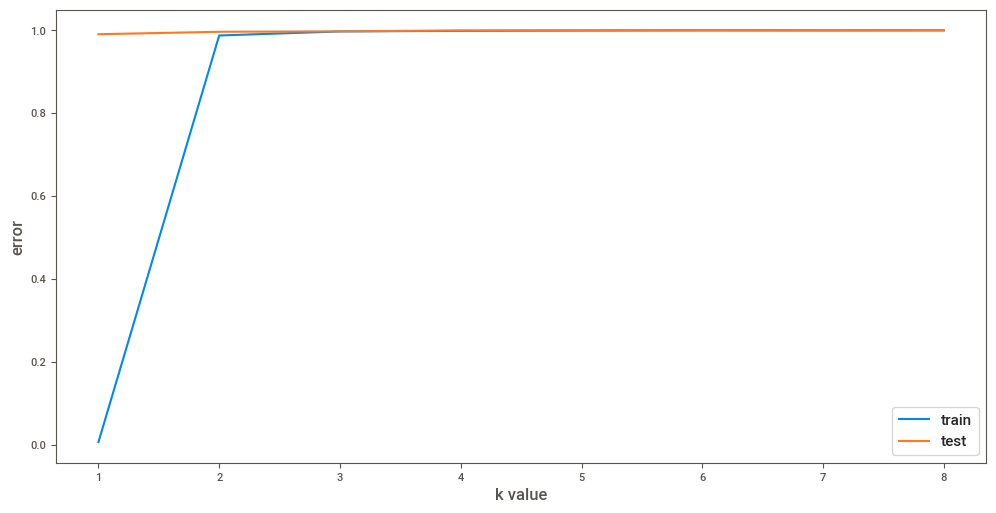

In [141]:
# finding the correct k

error_train=[]
error_test=[]
for k in range(1,9):
    knei = KNeighborsRegressor(n_neighbors=k)
    knei.fit(X_train,y_train)
    y_pred1=knei.predict(X_train)
    error_train.append(np.mean(y_train!=y_pred1)) 
    y_pred2=knei.predict(X_test)
    error_test.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,9),error_train,label='train')
plt.plot(range(1,9),error_test,label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend();

### Decision tree regressor

In [142]:
#get   data
dft = df1.copy(deep = True)

In [148]:
dft

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [143]:
#import tools for our decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [144]:
#define X and y
X = dft.drop(columns=['price'])
y = dft['price']

In [145]:
#split X and y in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [115]:
#lets define parameters and train the model

dtre = DecisionTreeRegressor(random_state=1,max_depth=11)
dtre.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=1)

In [116]:
#get  predictions
y_pred=dtre.predict(X_test)

In [117]:
#evaluate the r sqr
r2(y_test,y_pred)

0.7677568870792212

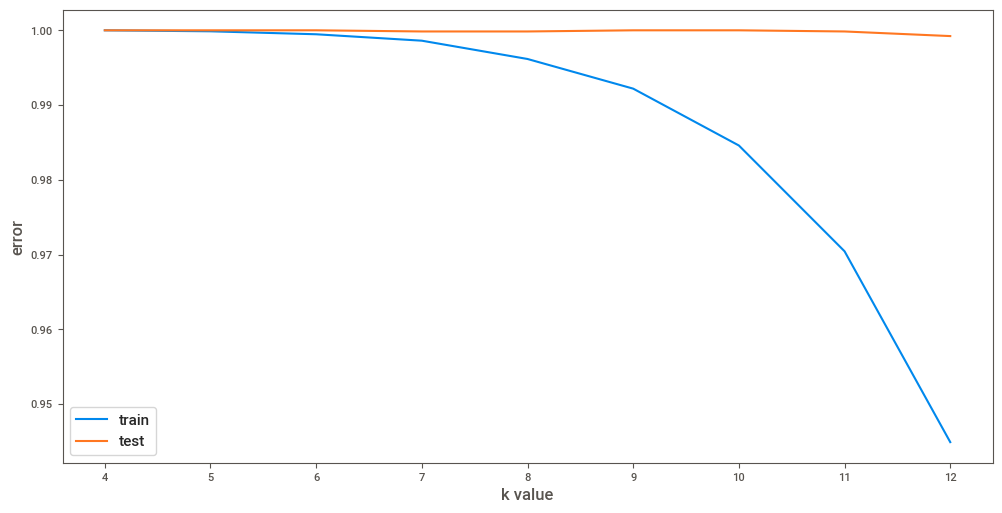

In [147]:
# lets try diferent max_depth

error_train=[]
error_test=[]
for k in range(4,13):
    dtre = DecisionTreeRegressor(random_state=1,max_depth=k)
    dtre.fit(X_train, y_train)
    y_pred1=dtre.predict(X_train)
    error_train.append(np.mean(y_train!=y_pred1)) 
    y_pred2=dtre.predict(X_test)
    error_test.append(np.mean(y_test!=y_pred2))
plt.plot(range(4,13),error_train,label='train')
plt.plot(range(4,13),error_test,label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend();